# 2022~2023 화재통계를 통하여 화재발생현황을 자세히 알아보자

화재는 인명 피해와 재산 손실을 초래하는 대표적인 재난으로, 소방청 화재 통계에 따르면 특정 유형의 화재가 반복적으로 발생하는 경향이 확인되었습니다. 이를 바탕으로 체계적인 분석과 예방 대책 마련이 필요성을 느꼈습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.파일 불러오기

##2023화재통계자료

In [ ]:
#소방청_연간화재통계 2023 불러오기

import pandas as pd

fire2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/소방청_연간화재통계_20231231.csv', encoding='EUC-KR')



#2022화재통계자료

In [ ]:
#소방청_연간화재통계 2022 불러오기
import pandas as pd

fire2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/소방청_화재발생 정보_20231231 (1).csv', encoding='EUC-KR')


<ipython-input-7-8d2d870b4c9f>:4: DtypeWarning: Columns (0,1,2,3,4,5,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  fire2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/소방청_화재발생 정보_20231231 (1).csv', encoding='EUC-KR')


# 2. 화재 통계 자료 재정리하기

In [ ]:
#2022년도 자료만 남기기,시군구 삭제하기

# '화재발생년원일'에서 연도 추출 (문자열 슬라이싱)
fire2022['연도'] = fire2022['화재발생년원일'].str[:4]

# 2022년 데이터만 남기기
fire2022 = fire2022[fire2022['연도'] == '2022']

# 필요없는   열    삭제하기
fire2022 = fire2022.drop(columns=["시군구",'화재유형','발화요인대분류','인명피해(명)소계','부동산','동산','장소대분류','장소중분류','사상자'], errors="ignore")
fire2023 = fire2023.drop(columns=["시_군_구",'화재유형','발화요인대분류','인명피해(명)소계','부동산','동산','장소대분류','장소중분류','사상자','발화열원대분류','발화열원소분류','최초착화물대분류',	'최초착화물소분류'], errors="ignore")




#3.정리된 자료 확인

In [ ]:
fire2022

,화재발생년원일,시도,발화요인소분류,사망,부상,재산피해소계,장소소분류,연도,발생월,월,계절,사상자
115029,2022-01-01 00:00:00,울산광역시,음식물 조리중,0.0,0.0,613.0,상점가,2022,1,1,겨울,0.0
115030,2022-01-01 00:06:00,경기도,담배꽁초,0.0,0.0,1610.0,연립주택,2022,1,1,겨울,0.0
115031,2022-01-01 00:08:00,인천광역시,담배꽁초,0.0,0.0,30.0,기타 건축물,2022,1,1,겨울,0.0
115032,2022-01-01 00:12:00,울산광역시,담배꽁초,0.0,0.0,31.0,공터,2022,1,1,겨울,0.0
115033,2022-01-01 00:13:00,경상남도,"기기(전기, 기계 등) 사용.설치부주의",0.0,0.0,181.0,아파트,2022,1,1,겨울,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
155137,2022-12-31 22:30:00,부산광역시,음식물 조리중,0.0,0.0,0.0,다세대주택,2022,12,12,겨울,0.0
155138,2022-12-31 22:42:00,대전광역시,절연열화에 의한 단락,0.0,0.0,445.0,"창고, 물품저장소",2022,12,12,겨울,0.0
155139,2022-12-31 23:04:00,부산광역시,음식물 조리중,0.0,0.0,89.0,다가구주택,2022,12,12,겨울,0.0
155140,2022-12-31 23:12:00,충청남도,접촉불량에 의한 단락,0.0,0.0,2667.0,기타 건축물,2022,12,12,겨울,0.0


In [ ]:
fire2023

,일시,시도,발화요인소분류,사망,부상,재산피해소계,장소소분류,발생월,월,계절
0,2023-01-01 00:00,경기도,"오일,연료누설",0,0,1100,승용자동차,1,1,겨울
1,2023-01-01 00:29,경상남도,기타(부주의),0,0,668,단독주택,1,1,겨울
2,2023-01-01 00:34,강원특별자치도,담배꽁초,0,0,580,다가구주택,1,1,겨울
3,2023-01-01 01:01,전북특별자치도,"기기(전기, 기계 등) 사용.설치부주의",0,0,1963,한의원,1,1,겨울
4,2023-01-01 01:34,경상남도,"불씨,불꽃,화원방치",0,0,210,기타야외,1,1,겨울
...,...,...,...,...,...,...,...,...,...,...
38852,2023-12-31 23:00,경상남도,제조상결함,0,0,99,오피스텔,12,12,겨울
38853,2023-12-31 23:05,부산광역시,담배꽁초,0,0,30,단독주택,12,12,겨울
38854,2023-12-31 23:35,충청북도,미상,0,0,13495,기타 주택,12,12,겨울
38855,2023-12-31 23:48,서울특별시,음식물 조리중,0,0,12,연립주택,12,12,겨울


####  한글 지원하기

In [ ]:
#차트에 한글 지원하기
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 나눔고딕 설정
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.8 MB/s eta 0:00:00


# 4. 각 년도의 시도별 화재건수 확인


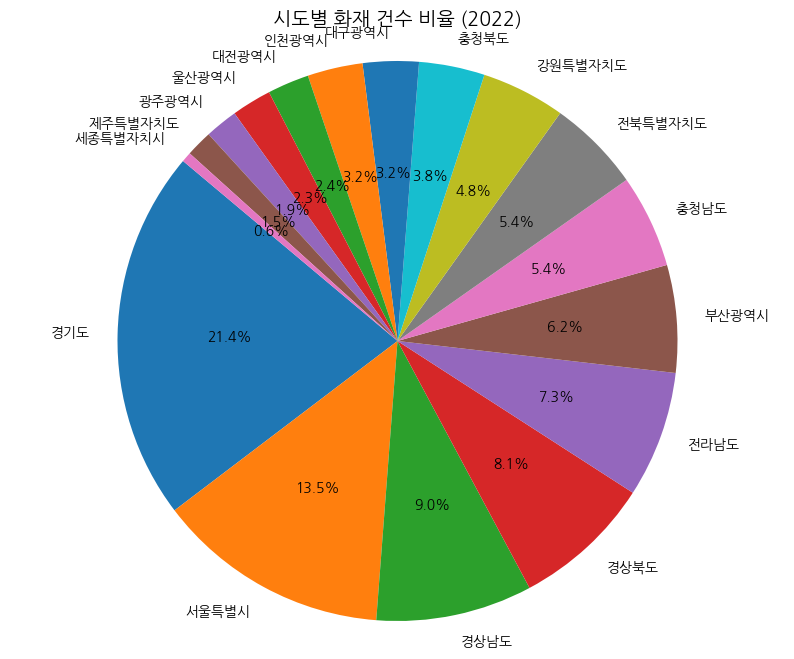

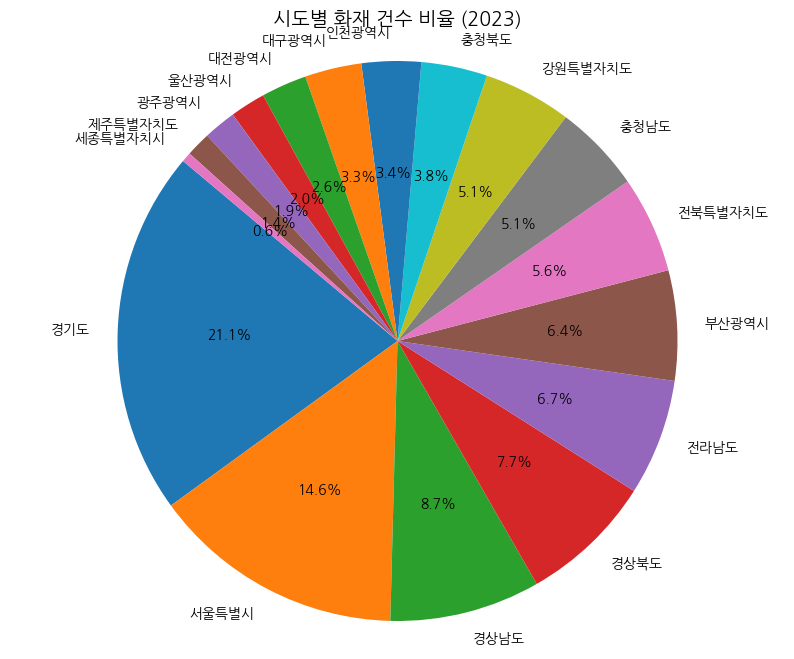

In [ ]:
import matplotlib.pyplot as plt

# 시도별 화재 건수 계산
시도별_화재건수 = fire2022['시도'].value_counts()

# 원그래프 생성
plt.figure(figsize=(10, 8))
plt.pie(시도별_화재건수, labels=시도별_화재건수.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('시도별 화재 건수 비율 (2022)', fontsize=14)
plt.axis('equal')  # 원형 비율 유지

# 시도별 화재 건수 계산
시도별_화재건수 = fire2023['시도'].value_counts()

# 원그래프 생성
plt.figure(figsize=(10, 8))
plt.pie(시도별_화재건수, labels=시도별_화재건수.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('시도별 화재 건수 비율 (2023)', fontsize=14)
plt.axis('equal')  # 원형 비율 유지

# 그래프 표시
plt.show()

2023년 시도별 화재 건수 비율을 보면, 경기도(21.1%)와 서울특별시(14.6%)가 가장 높은 비중을 차지하며, 인구와 시설 밀집도가 화재 발생 위험을 높이는 주요 요인으로 보입니다. 경상남도(8.7%), 경상북도(7.7%), 전라남도(6.7%) 등은 농어촌 지역의 특성이 반영된 결과로 보이며, 도심과 농촌의 화재 예방 대책이 차별화될 필요가 있습니다. 지역별 특성을 반영한 맞춤형 정책 설계가 필요하며 농어촌 지역에서는 논이나 밭에서 소각하는 행위는 자제해야 할 것 입니다

#5.월별 화재 건수 확인

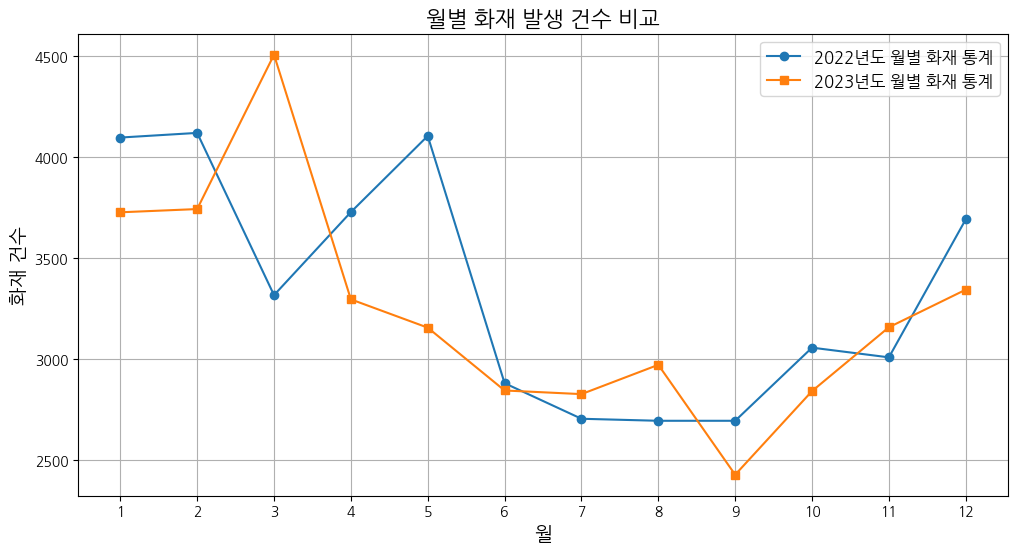

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째 데이터셋에서 월별 화재 건수 집계
if '화재발생년원일' in fire2022.columns:
    fire2022['발생월'] = fire2022['화재발생년원일'].str[5:7].astype(int)
    월별_fire2022 = fire2022.groupby('발생월').size()  # 변수 이름 수정

# 두 번째 데이터셋에서 월별 화재 건수 집계
if '일시' in fire2023.columns:
    fire2023['발생월'] = fire2023['일시'].str[5:7].astype(int)
    월별_fire2023 = fire2023.groupby('발생월').size()  # 변수 이름 수정

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(월별_fire2022.index, 월별_fire2022.values, marker='o', label='2022년도 월별 화재 통계')
plt.plot(월별_fire2023.index, 월별_fire2023.values, marker='s', label='2023년도 월별 화재 통계')

# 그래프 꾸미기
plt.title('월별 화재 발생 건수 비교', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('화재 건수', fontsize=14)
plt.xticks(range(1, 13))
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



2022년과 2023년 화재 발생 건수를 비교한 결과, 겨울철(13월, 12월)에 화재 발생이 집중되는 경향이 나타났습니다. 2023년은 3월과 12월에 화재 발생이 더 많았으며, 여름철(7,8월)에는 화재 발생이 상대적으로 적었습니다.

# 6. 계절별 화재장소 확인

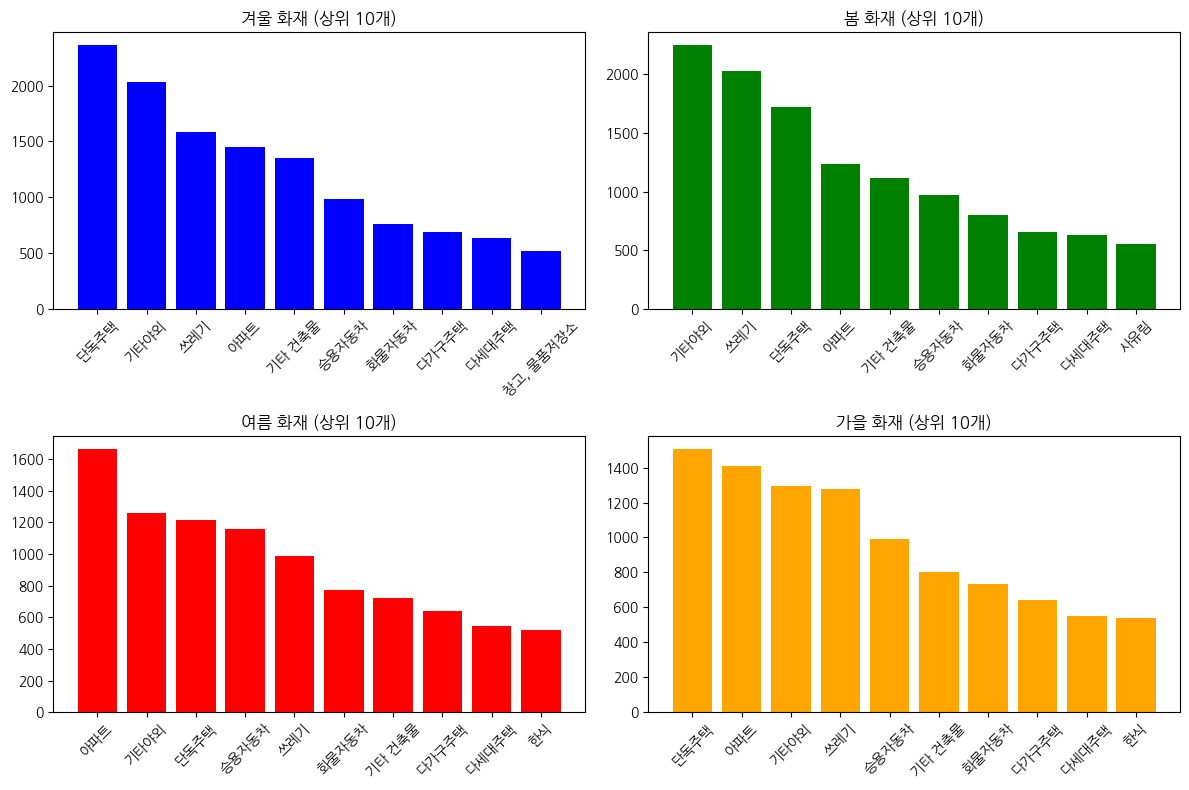

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# fire2023과 fire2022 데이터를 로드했다고 가정합니다.

# 날짜 데이터를 문자열로 처리하여 월 추출하기
fire2023["월"] = fire2023["일시"].str[5:7].astype(int)
fire2022['월'] = fire2022['화재발생년원일'].str[5:7].astype(int)

# 월 정보를 계절로 변환하기 위한 딕셔너리 생성
월별_계절 = {
    12: "겨울", 1: "겨울", 2: "겨울",
    3: "봄", 4: "봄", 5: "봄",
    6: "여름", 7: "여름", 8: "여름",
    9: "가을", 10: "가을", 11: "가을"
}

# 계절 정보를 추가하기
fire2023["계절"] = [월별_계절[월] for 월 in fire2023["월"]]
fire2022["계절"] = [월별_계절[월] for 월 in fire2022["월"]]

# 두 데이터셋을 하나로 합칩니다.
fire_combined = pd.concat([fire2023, fire2022], ignore_index=True)

# 슬라이싱을 통해 계절별 장소소분류별 화재 건수를 계산합니다.
겨울_화재 = fire_combined[fire_combined["계절"] == "겨울"]["장소소분류"].value_counts().head(10).reset_index()
겨울_화재.columns = ["장소소분류", "화재 건수"]
봄_화재 = fire_combined[fire_combined["계절"] == "봄"]["장소소분류"].value_counts().head(10).reset_index()
봄_화재.columns = ["장소소분류", "화재 건수"]
여름_화재 = fire_combined[fire_combined["계절"] == "여름"]["장소소분류"].value_counts().head(10).reset_index()
여름_화재.columns = ["장소소분류", "화재 건수"]
가을_화재 = fire_combined[fire_combined["계절"] == "가을"]["장소소분류"].value_counts().head(10).reset_index()
가을_화재.columns = ["장소소분류", "화재 건수"]

# 계절별 화재 건수 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(겨울_화재["장소소분류"], 겨울_화재["화재 건수"], color='blue')
plt.title("겨울 화재 (상위 10개)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(봄_화재["장소소분류"], 봄_화재["화재 건수"], color='green')
plt.title("봄 화재 (상위 10개)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(여름_화재["장소소분류"], 여름_화재["화재 건수"], color='red')
plt.title("여름 화재 (상위 10개)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(가을_화재["장소소분류"], 가을_화재["화재 건수"], color='orange')
plt.title("가을 화재 (상위 10개)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




 계절과 상관없이 단독주택과 아파트가 주요 화재 장소로 나타났습니다. 대부분의 생활을 자택에서 지내는 특성으로 인해 화재 발생 빈도가 매우 높았습니다. 그 뒤로 야외 지역, 건축물, 자동차가 뒤따르지만 봄에는 단독주택, 아파트를 제치고 쓰레기 기타야외에서 화재 발생 빈도가 가장 높았습니다.
  

# 7.계절별 발화요인 확인(미확인 단락->확인되지않은 전기화재)

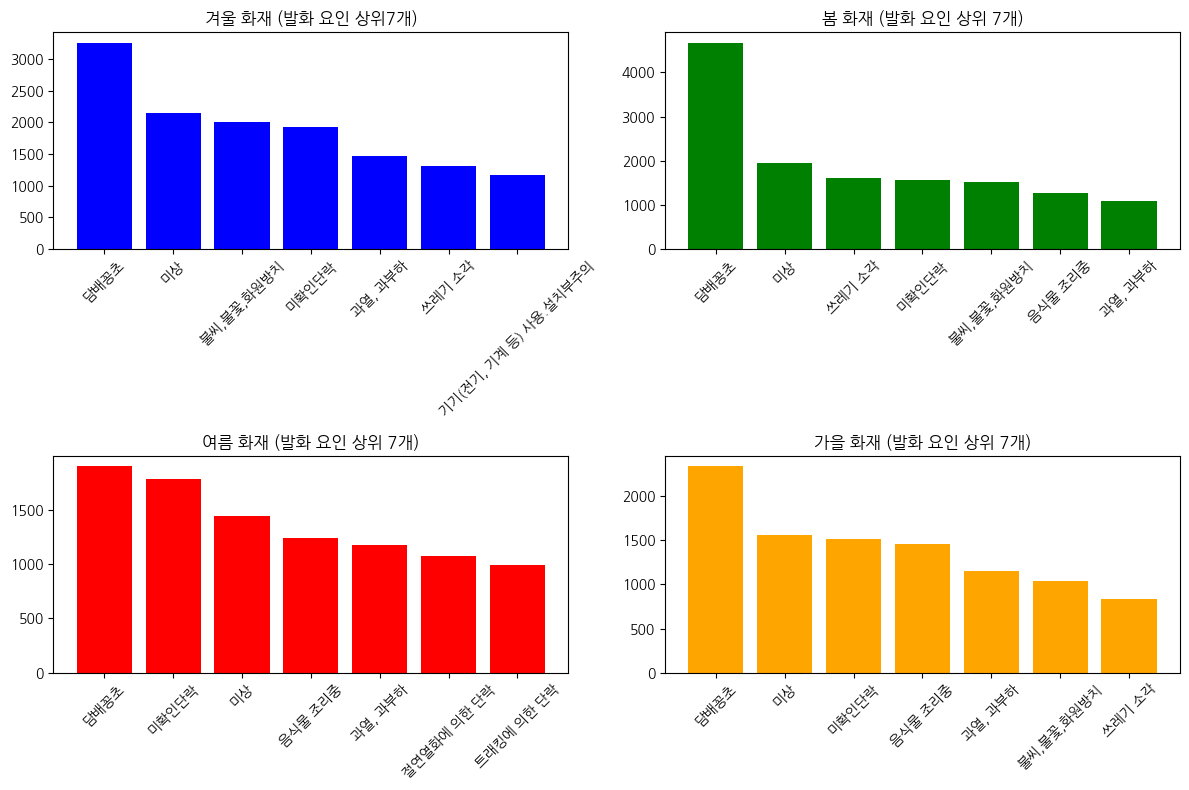

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# fire2023과 fire2022 데이터를 로드했다고 가정합니다.

# 날짜 데이터를 문자열로 처리하여 월 추출하기
fire2023["월"] = fire2023["일시"].str[5:7].astype(int)
fire2022['월'] = fire2022['화재발생년원일'].str[5:7].astype(int)


# 월 정보를 계절로 변환하기 위한 딕셔너리 생성
월별_계절 = {
    12: "겨울", 1: "겨울", 2: "겨울",
    3: "봄", 4: "봄", 5: "봄",
    6: "여름", 7: "여름", 8: "여름",
    9: "가을", 10: "가을", 11: "가을"
}

# 계절 정보를 추가하기
fire2023["계절"] = [월별_계절[월] for 월 in fire2023["월"]]
fire2022["계절"] = [월별_계절[월] for 월 in fire2022["월"]]

# 두 데이터셋을 하나로 합칩니다.
fire_combined = pd.concat([fire2023, fire2022], ignore_index=True)

# 슬라이싱을 통해 계절별 발화요인소분류별 화재 건수를 계산합니다.
겨울_화재 = fire_combined[fire_combined["계절"] == "겨울"]["발화요인소분류"].value_counts().head(7).reset_index()
겨울_화재.columns = ["발화요인소분류", "화재 건수"]
봄_화재 = fire_combined[fire_combined["계절"] == "봄"]["발화요인소분류"].value_counts().head(7).reset_index()
봄_화재.columns = ["발화요인소분류", "화재 건수"]
여름_화재 = fire_combined[fire_combined["계절"] == "여름"]["발화요인소분류"].value_counts().head(7).reset_index()
여름_화재.columns = ["발화요인소분류", "화재 건수"]
가을_화재 = fire_combined[fire_combined["계절"] == "가을"]["발화요인소분류"].value_counts().head(7).reset_index()
가을_화재.columns = ["발화요인소분류", "화재 건수"]

# 계절별 화재 건수 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(겨울_화재["발화요인소분류"], 겨울_화재["화재 건수"], color='blue')
plt.title("겨울 화재 (발화 요인 상위7개)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(봄_화재["발화요인소분류"], 봄_화재["화재 건수"], color='green')
plt.title("봄 화재 (발화 요인 상위 7개)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(여름_화재["발화요인소분류"], 여름_화재["화재 건수"], color='red')
plt.title("여름 화재 (발화 요인 상위 7개)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(가을_화재["발화요인소분류"], 가을_화재["화재 건수"], color='orange')
plt.title("가을 화재 (발화 요인 상위 7개)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




담배꽁초는 모든 계절에서 가장 큰 화재 원인입니다. 겨울에는 난방기기, 봄과 가을에는 쓰레기 소각, 여름에는 전기적 과부하가 주요 원인으로 확인됩니다. 산불 캠페인을 통해 담배꽁초로 인한 화재의 위험성을 알리고 오래된 전자제품 교체, 전압에 맞는 콘센트 사용 및 관리를 꼼꼼히 하는 것이 중요합니다.

#8. 사상자 확인



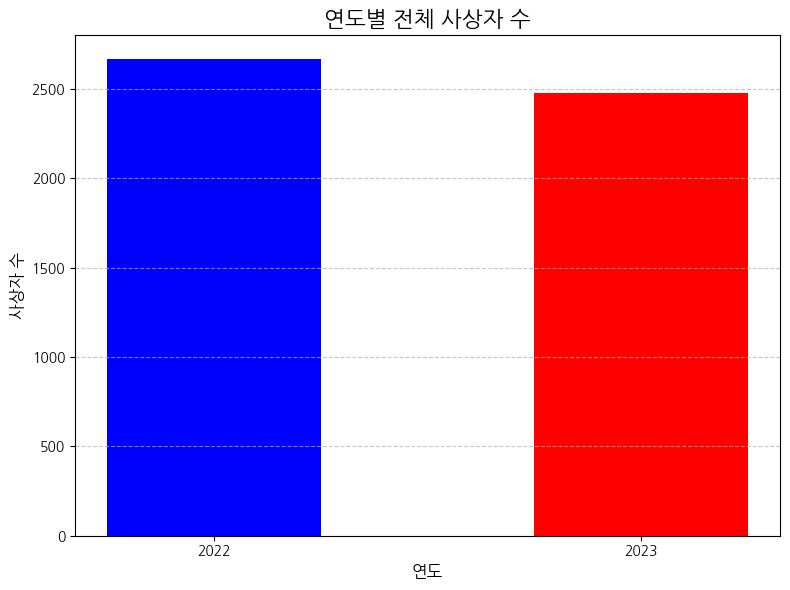

In [ ]:

# 2022 데이터 처리 (사망 + 부상 = 사상자)
fire2022['사상자'] = fire2022['사망'] + fire2022['부상']
사상자_2022 = fire2022['사상자'].sum()

# 2023 데이터 처리 (사망 + 부상 = 사상자)
fire2023['사상자'] = fire2023['사망'] + fire2023['부상']
사상자_2023 = fire2023['사상자'].sum()

# 전체 사상자 데이터 생성
years = ['2022', '2023']
사상자_수 = [사상자_2022, 사상자_2023]

# 막대그래프 생성
plt.figure(figsize=(8, 6))
plt.bar(years, 사상자_수, color=['b', 'r'], width=0.5)

# 그래프 설정
plt.title('연도별 전체 사상자 수', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('사상자 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.tight_layout()
plt.show()


사상자수는 2022,2023 큰차이가 없는 것으로 나타났습니다.

# 9. 재산피해 확인

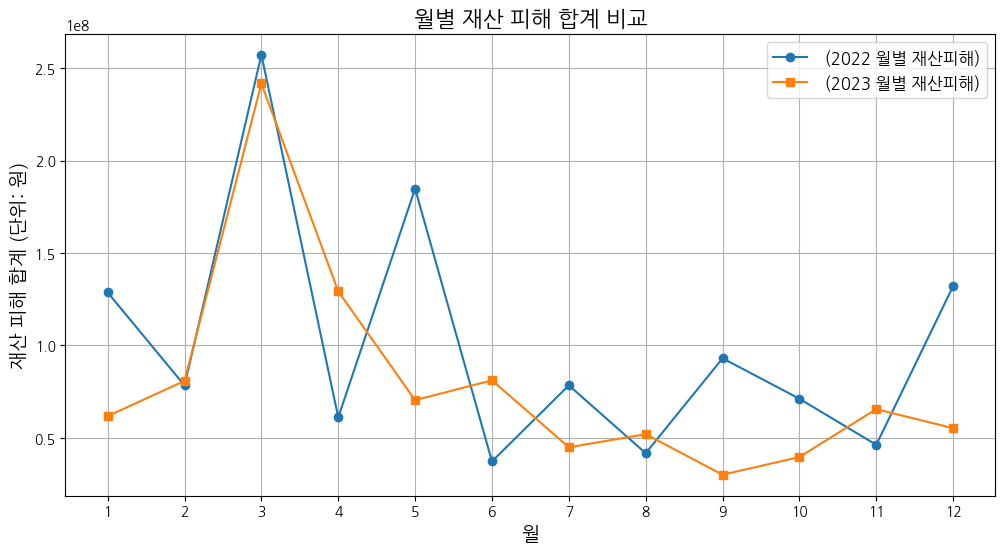

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# 첫 번째 데이터셋에서 월별 재산피해 합계 집계
if '화재발생년원일' in fire2022.columns and '재산피해소계' in fire2022.columns:
    fire2022['발생월'] = fire2022['화재발생년원일'].str[5:7].astype(int)
    월별_재산피해_2022 = fire2022.groupby('발생월')['재산피해소계'].sum()


# 두 번째 데이터셋에서 월별 재산피해 합계 집계
if '일시' in fire2023.columns and '재산피해소계' in fire2023.columns:
    fire2023['발생월'] = fire2023['일시'].str[5:7].astype(int)
    월별_재산피해_2023 = fire2023.groupby('발생월')['재산피해소계'].sum()


# 그래프 시각화
plt.figure(figsize=(12, 6))
if 월별_재산피해_2022.any():
    plt.plot(월별_재산피해_2022.index, 월별_재산피해_2022.values, marker='o', label=' (2022 월별 재산피해)')
if 월별_재산피해_2023.any():
    plt.plot(월별_재산피해_2023.index, 월별_재산피해_2023.values, marker='s', label=' (2023 월별 재산피해)')

# 그래프 꾸미기
plt.title('월별 재산 피해 합계 비교', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('재산 피해 합계 (단위: 원)', fontsize=14)
plt.xticks(range(1, 13))
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


위 그래프는 2022년과 2023년의 월별 재산 피해 합계를 비교한 것으로, 주요 내용을 정리하면 다음과 같습니다. 2022년은 4월에 재산 피해가 가장 컸으며, 이는 다른 월에 비해 큰 차이를 보이는 특징적인 패턴입니다. 2023년은 상대적으로 일정한 분포를 보였으나, 1월과 12월에 피해 규모가 증가한 것으로 나타났습니다. 또한, 두 해 모두 7월부터 9월까지는 재산 피해가 낮은 수준을 유지하는 경향이 확인되었습니다. 재산 피해는 특정 월(3월, 4월)에 집중되며, 겨울철(1월, 12월)에도 피해가 증가하는 경향이 있어 이 시기에 집중적인 예방 대책과 화재 안전 관리가 필요합니다.